# Introduction - Analysis of U.S. Contagious Diseases

Our dataset includes records of different contagious diseases, the states in which they were reported, the number of reported cases, and the population at the time of reporting.

**Source:** TODO  
**Size:** 18,870 rows with 6 columns

## Columns of Interest:

- **Disease:** Name of Contagious Disease
- **State:** U.S. state of report
- **Year:** The year the disease was reported
- **Weeks Reporting:** Number of weeks in the year the disease was reported
- **Count:** The number of reported cases
- **Population:** Population of the state during the year of report

## Questions of Interest:

- How does the population size affect the spread?
- Which state is most affected by diseases?
- How quickly do cases drop after vaccines implementation?
- Which disease spread the fastest?


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/yosephhabtu/US-Contagious-Diseases/main/us_contagious_diseases.csv')
print(df.head())

       disease    state  year  weeks_reporting  count  population
0  Hepatitis A  Alabama  1966               50    321   3345787.0
1  Hepatitis A  Alabama  1967               49    291   3364130.0
2  Hepatitis A  Alabama  1968               52    314   3386068.0
3  Hepatitis A  Alabama  1969               49    380   3412450.0
4  Hepatitis A  Alabama  1970               51    413   3444165.0


In [3]:
df = df.dropna()
df.describe()

,year,weeks_reporting,count,population
count,18666.000000,18666.000000,18666.000000,1.866600e+04
mean,1974.419211,33.599111,1380.562092,4.242911e+06
std,21.661231,19.942055,5534.444941,4.804728e+06
min,1928.000000,0.000000,0.000000,8.685300e+04
25%,1957.000000,16.000000,2.000000,1.046542e+06
50%,1977.000000,44.000000,49.000000,2.824918e+06
75%,1992.000000,50.000000,453.000000,5.153640e+06
max,2011.000000,52.000000,132342.000000,3.760752e+07


In [4]:
by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})
by_state

<ipython-input-4-55b40c2bf363>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state = df.groupby(['state']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})


,mean_count,mean_pop
state,,
Alabama,749.875676,3.689245e+06
Alaska,76.798507,4.716158e+05
Arizona,712.600000,2.651265e+06
Arkansas,525.129730,2.202317e+06
California,5441.713514,2.199560e+07
Colorado,945.497297,2.673458e+06
Connecticut,1343.316216,2.839231e+06
Delaware,129.381081,5.563034e+05
District Of Columbia,226.891892,6.631107e+05


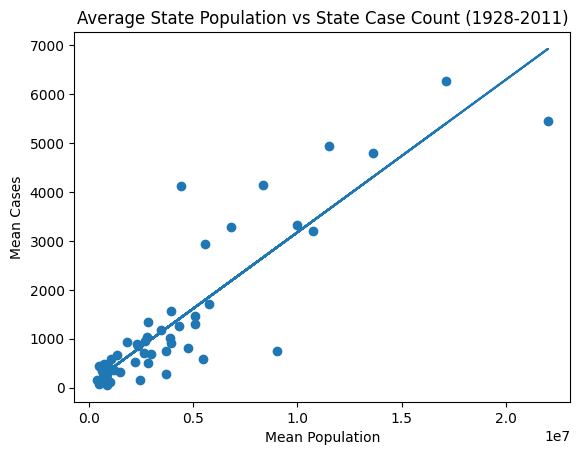

In [5]:
x = by_state.mean_pop
y = by_state.mean_count

plt.scatter(x, y)
plt.xlabel('Mean Population')
plt.ylabel('Mean Cases')
plt.title('Average State Population vs State Case Count (1928-2011)')

import numpy as np
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope*x + intercept)
plt.show()

In [16]:
# Look at changes in measles, mumps, and rubella cases after implementation of the MMR vaccine in 1971
# filter for MMR:

mmr = df.query("disease == 'Measles'" or "disease == 'Mumps'" or "disease == 'Rubella'")
print(mmr.head(5))

      disease    state  year  weeks_reporting  count  population
2346  Measles  Alabama  1928               52   8843   2589923.0
2347  Measles  Alabama  1929               49   2959   2619131.0
2348  Measles  Alabama  1930               52   4156   2646248.0
2349  Measles  Alabama  1931               49   8934   2670818.0
2350  Measles  Alabama  1932               41    270   2693027.0


In [19]:
mmr_means = mmr.groupby(['disease', 'year']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})
print(mmr_means.head(5)) #group by disease, and year; calculate mean count and population

               mean_count      mean_pop
disease year                           
Measles 1928  9864.020408  2.444276e+06
        1929  6919.612245  2.476576e+06
        1930  7848.918367  2.505613e+06
        1931  8947.653061  2.530758e+06
        1932  7961.510204  2.552372e+06


<ipython-input-19-6d2906c92040>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mmr_means = mmr.groupby(['disease', 'year']).mean()[['count', 'population']].rename(columns = {'count':'mean_count', 'population':'mean_pop'})


In [20]:
mmr_means['ppc'] = mmr_means['mean_count']/ mmr_means['mean_pop'] * 100 # create calculated "percentage per capita" column
print(mmr_means.head(5))

               mean_count      mean_pop       ppc
disease year                                     
Measles 1928  9864.020408  2.444276e+06  0.403556
        1929  6919.612245  2.476576e+06  0.279402
        1930  7848.918367  2.505613e+06  0.313253
        1931  8947.653061  2.530758e+06  0.353556
        1932  7961.510204  2.552372e+06  0.311926


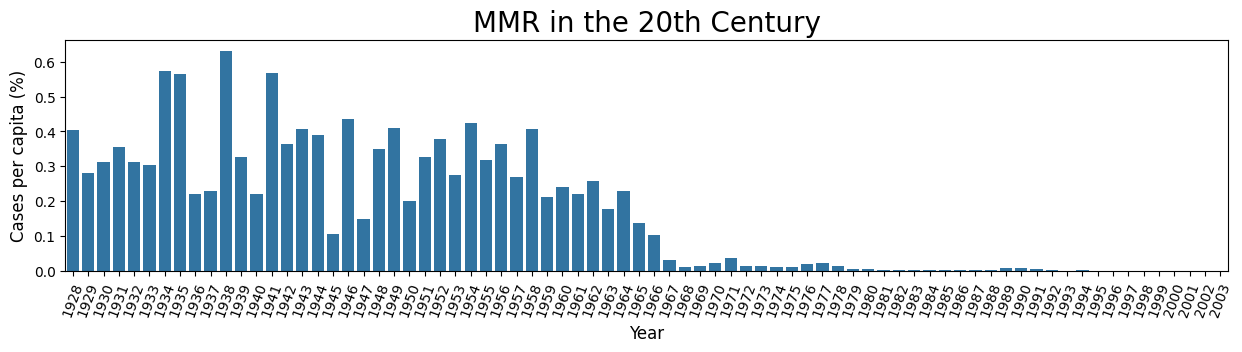

In [57]:
fig, ax = plt.subplots(figsize = ( 15 , 3 ))
sns.barplot(x = 'year', y = 'ppc', data = mmr_means)
ax.set_xlabel( 'Year' , size = 12 )
ax.set_ylabel('Cases per capita (%)' , size = 12 )
ax.set_title("MMR in the 20th Century" , size = 20 )
plt.xticks(rotation=70)
plt.show()

      disease    state  year  weeks_reporting  count  population
11894   Polio  Alabama  2000               50     17   4447100.0
11895   Polio  Alabama  2001               48     35   4488959.0
11896   Polio  Alabama  2002               45     37   4528129.0
11897   Polio  Alabama  2003               46     14   4564878.0
11898   Polio  Alabama  2004               45     41   4599490.0


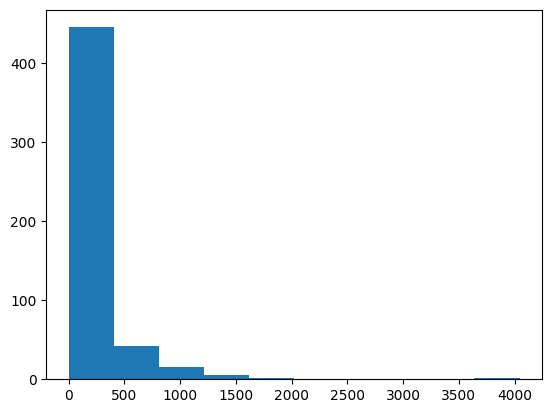

clearly the counts are skewed, thus the median is a better measure of the center 

the bootstrapped median cases per state in the 2000s is 84.6315 

assuming all people with polio survived (which is unlikely),
a median between 16.9263 and 33.8526 people
per state infected with polio in the 2000s live with PPS now


In [ ]:
# simulate a non-parametric inference of the median of a quantitative variable
polio = df.query("disease == 'Polio'")

# the symptoms of post-polio syndrome can take up to 15 years to present, thus
# limit the end year to 2009
polio_2000s = polio.query("year >= 2000 & year <=2009")
print(polio_2000s.head(5))

# visualize the distribution of polio infection counts by states in the 2000s
plt.hist(polio_2000s["count"])
plt.show()

print("clearly the counts are skewed, thus the median is a better measure of the center \n")

# the number of states is 50, and there are 10 years, thus 500 units in the data
medians_boot_samples = []
for i in range(1000):
  boot_sample = np.random.choice(polio_2000s["count"], 50)
  medians_boot_samples.append(np.median(boot_sample))

median_cases = np.mean(medians_boot_samples)
print(f"the bootstrapped median cases per state in the 2000s is {median_cases} \n")

# post-polio syndrome affects between 20% to 40% of polio survivors
print("assuming all people with polio survived (which is unlikely),")
print(f"a median between {0.2*median_cases} and {0.4*median_cases} people")
print("per state infected with polio in the 2000s live with PPS now")

In [ ]:
conf_int = np.percentile(medians_boot_samples, [2.5, 97.5])
conf_int

array([ 51.   , 125.025])

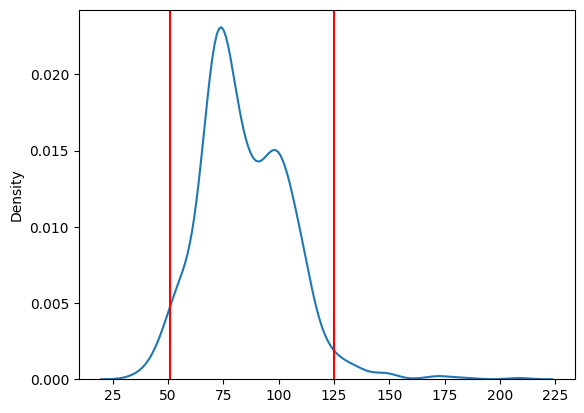

In [ ]:
import seaborn as sns
sns.kdeplot(medians_boot_samples)
for endpoint in conf_int:
    plt.axvline(endpoint, color='red')

In [ ]:
# repeat the same process using seaborn

from sklearn.utils import resample
medians_boot_samples = []
for i in range(1000):
                boot_sample = resample(polio_2000s["count"]) # does bootstrap; replace = True
                medians_boot_samples.append(np.median(boot_sample))

print(np.mean(medians_boot_samples))
print("the results are very similar")

82.455
the results are very similar
